교안2-02Supervised-learning-with-scikit-learn.pdf

1. 지도학습 (Supervised Learning)
2. 선형회귀분석 하기
3. Scikilearn 으로 보스턴 주택가격 데이터 회귀분석

# 1. 지도학습 (Supervised Learning)

학습 데이터를 이용해 해석용 모델을 만들고 그것을 바탕으로 새로운 데이터를 추정(predict)하는 것이다. 보통 분류Classifiction, 회귀Regression 및 신경망을 활용한다.
 - 특징을 가진 데이터와 정답(목적)을  나타내는 데이터를 선정해 학습
 - 이미 알려진 사례로 일반화된 모델을 만들어 의사 결정 프로세스를 자동화하는 것

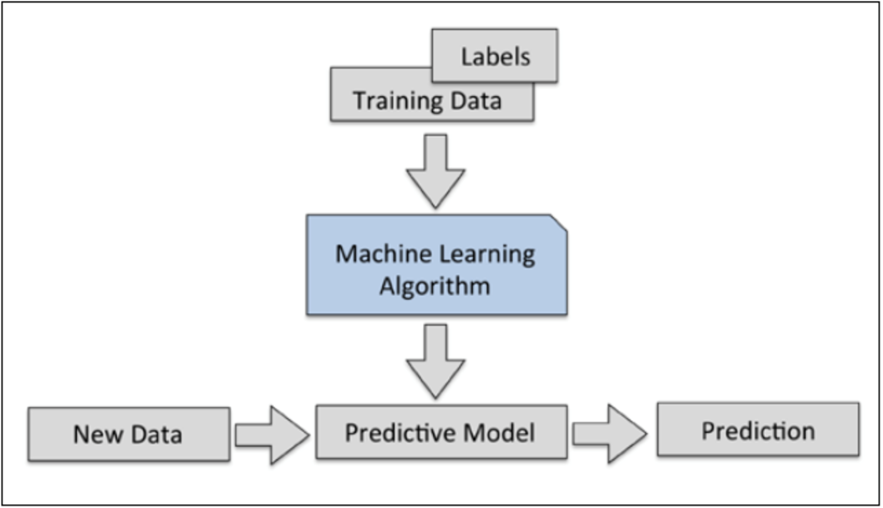

## 지도학습의 종류
 회귀: 연속된 시계열/순차 데이터를 통해 선형분석을 통해 예측
 분류: 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것


### 주요 지도학습 알고리즘과 분류 및 회귀 문제 여부

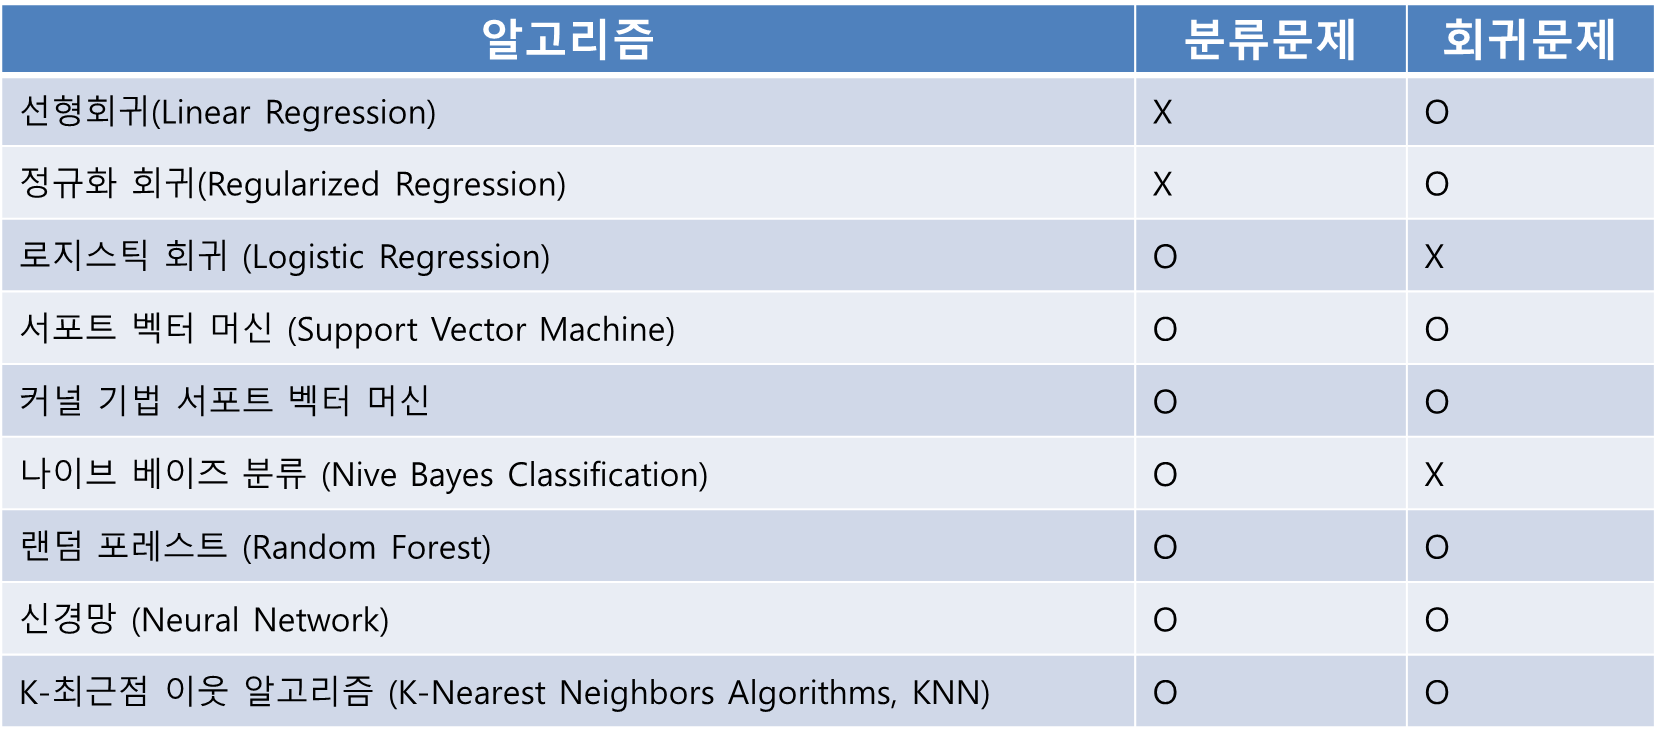

# 2. 선형회귀분석 하기

NumPy 와 Scikitleanr 을 이용해 선형회귀하는 방법을 알아보자.

1. [NumPy 이용 선형회귀 분석](#1.-NumPy-이용-선형회귀-분석)
2. [Scikit-learn 이용 선형회귀 분석](#2.-Scikit-learn-이용-선형회귀-분석)
3. [Scikilearn 으로 보스턴 주택가격 데이터 회귀분석](#3.-Scikilearn-으로-보스턴-주택가격-데이터-회귀분석)

## 2.1 회귀 (Regression)

지도학습은 **분류** 와 **회귀** 로 나뉘는데 이 둘의 차이는 
 - 분류는 예측 값이 카테고리와 같은 이산형 클래스이고
 - 회귀는 연속형 숫자라는 것 이다.


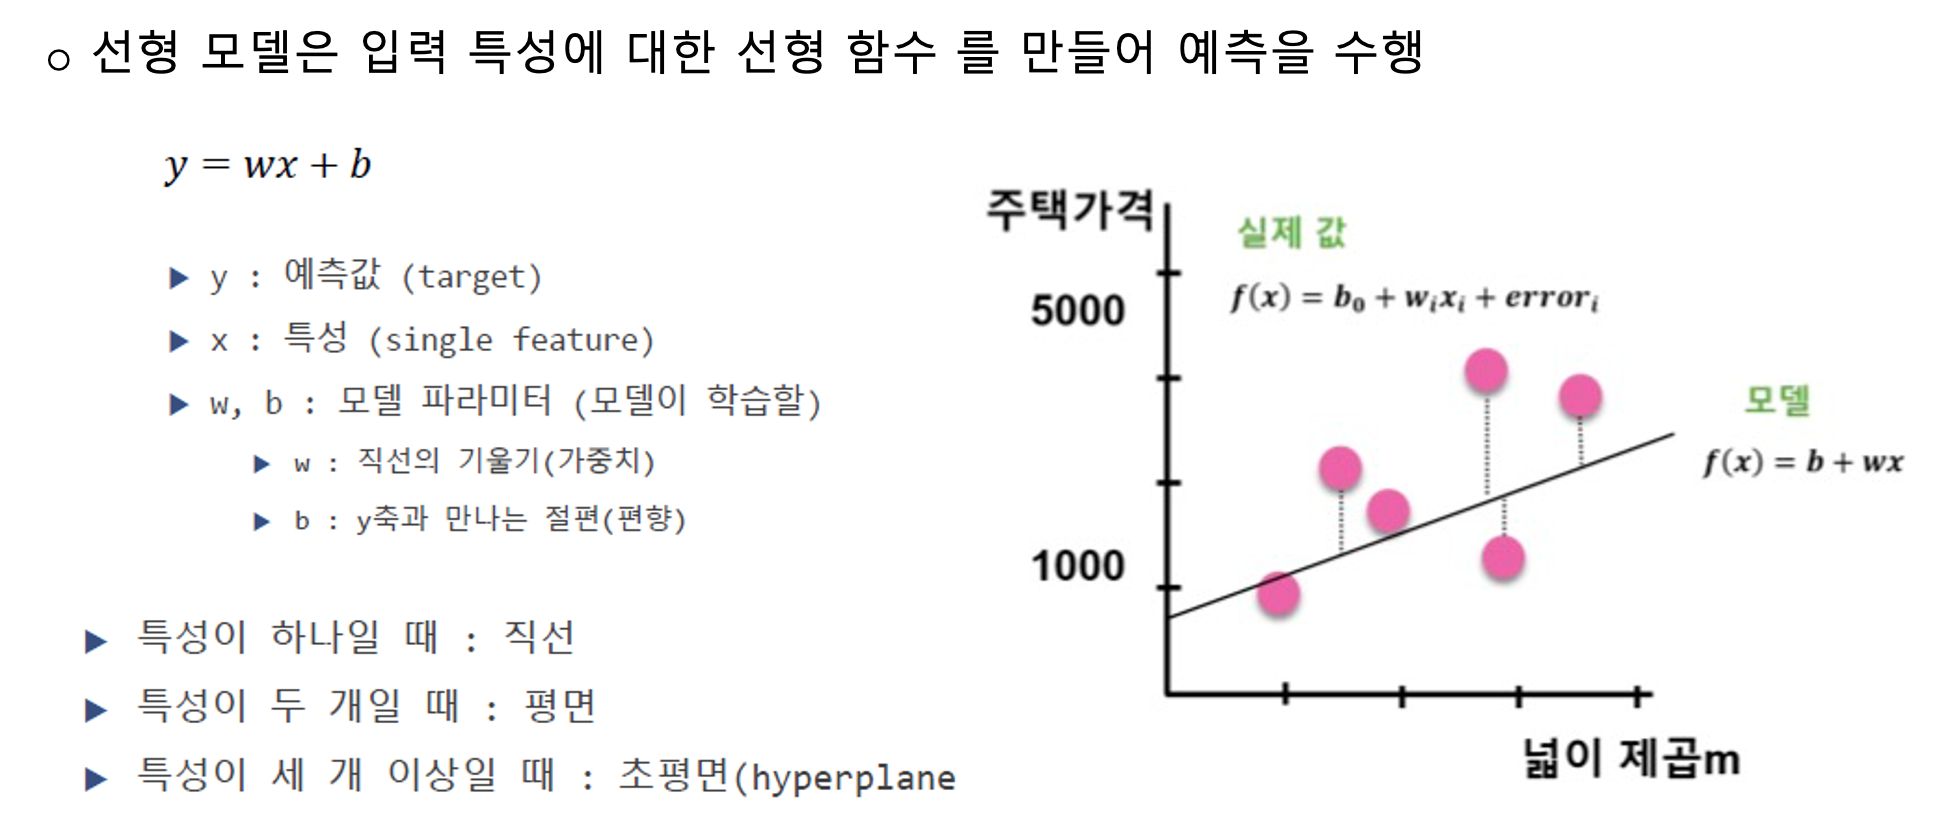
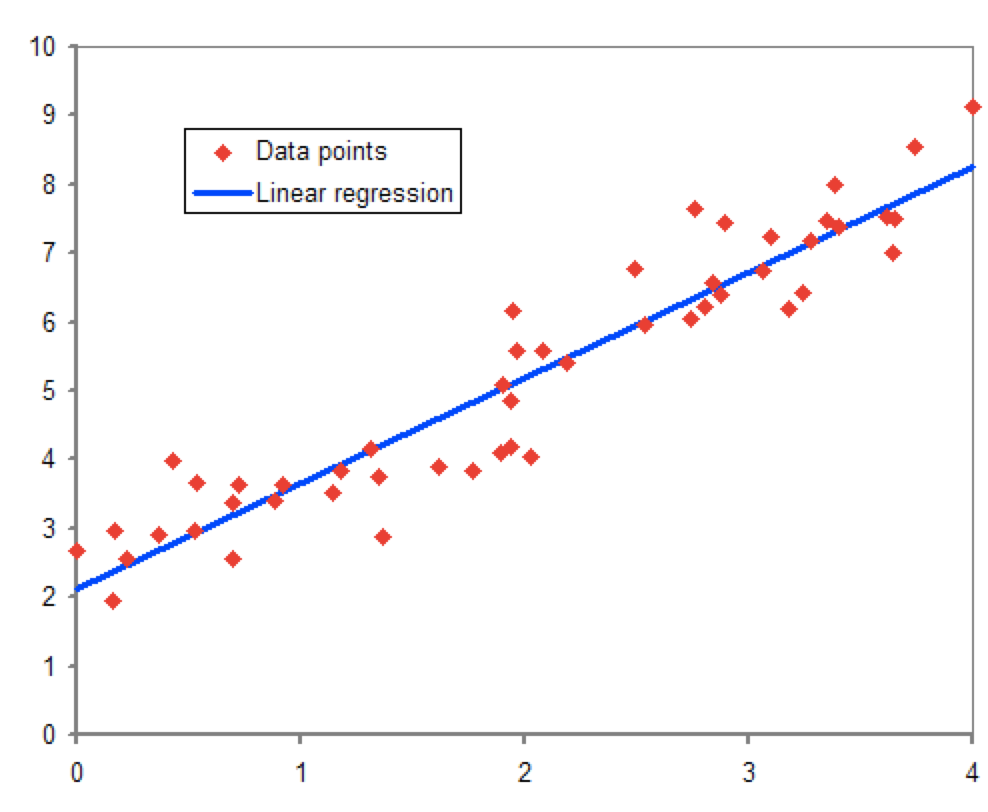

### 선형회귀 모델

선형회귀 모델은 규제(Regulation) 방법에 따라서 달라지는데, 대표적 선형회귀 모델은
 - **일반선형회귀**: 예측값과 실제 값의 RSS(잔차,오류 값 Residual Sum of Square)을 최소화 할 수 있도록 회귀 계수를 최적화 해서 규제를 적용하지 않는 모델
 - **릿지(Ridge)**: 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. L2 규제는 상대적으로 큰 회귀계수 값의 예측 영향도를 감소시키기 위해서 회귀계수 값을 더 작게 만드는 규제 모델이다. 즉 과대적합 되지 않도록 하는 것이다.
 - **라쏘(Rasso)**: 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방법이다. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 예측 시 피처가 선택되지 않게 하는 것이다. 이런 특성 때문에 L1 규제는 피처 선택 기능으로 불린다.
 - **엘라스틱넷(ElasticNet)**: L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용, L1 규제로 피처 개수를 줄이고 동시에 L2 규제로 계수 값 크기를 조정한다.
 - **로지스틱 회귀**: 분류의 선형모델로 로지스틱 회귀는 이진분류, 희소 영역 분류, 텍스트 분류 등에서 뛰어난 예측 성능.


## 2.1. NumPy 이용 선형회귀 분석

NumPy로 선형회귀 분석을 해보자

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

plt.rc('font', family=fontname)  #  'NanumGothic'
# plt.rcParams["font.family"] = fontname

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

### make_regression()

sklearn.datasets 패키지는 다양한 연습 데이터를 제공하며 회귀와 분류 모델을 테스트하기 위한 가상 데이터를 생성하는 다양한 함수를 제공

In [ ]:
from sklearn.datasets import make_regression

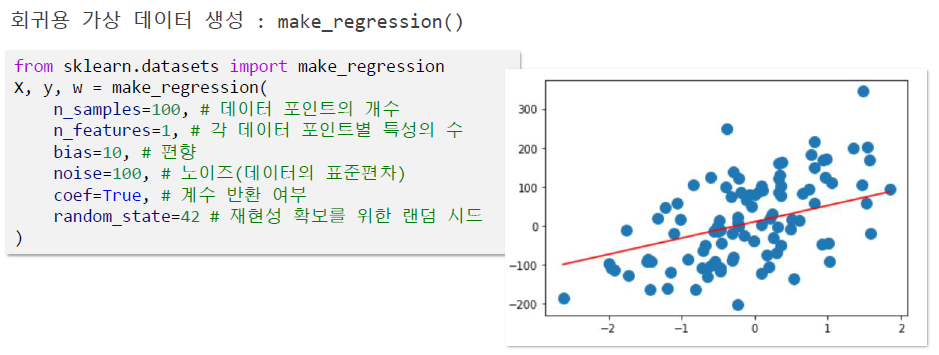

In [ ]:
bias = 100 #편중
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = np.hstack([np.ones((X0.shape[0],1)), X0])
print("X 상수항 추가:\n",
     X[:5],
     "\ny:\n",
     y[:5],
     "\n w:\n",
     w
)

make_regression 으로 생성한 회귀모형의 식은 편중, 독립변수, 종속변수 및 회귀계수를 포함해 아래 같은 관계를 갖는다.

$$
y = 100 + 86.4479 x + \epsilon
$$

데이터 분포 확인

In [ ]:
plt.plot(X0, y, 'o', label='회귀데이터')
# plt.scatter(X0, y, label='data')
plt.legend()
plt.show()

### 회귀계수 찾기

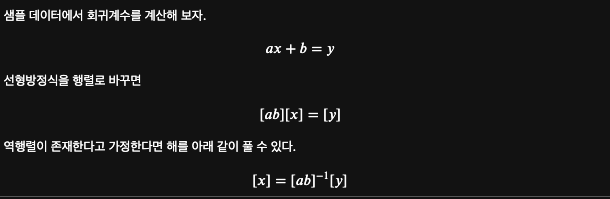



위에서 구한 수식을 이용해 선형회귀 계수를 추정하면

 - `@` 행렬곱: https://numpy.org/devdocs/user/numpy-for-matlab-users.html

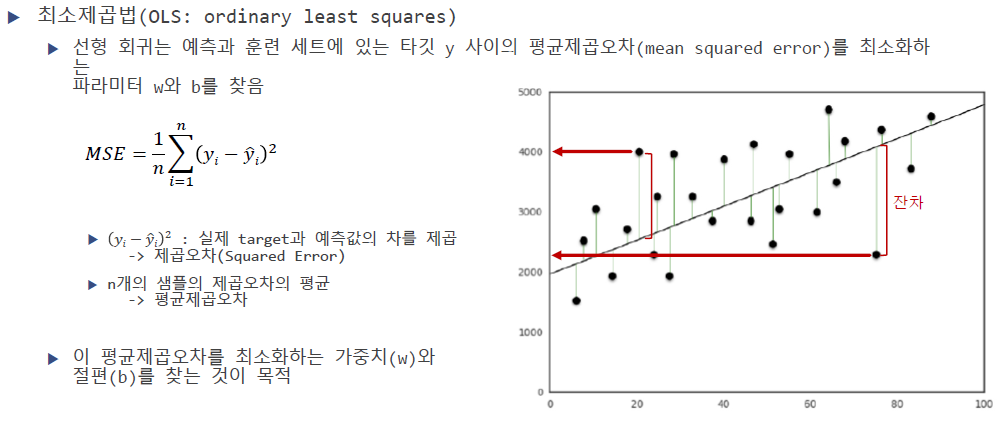

In [ ]:
# OLS 해를 직접 이용하면
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

이것은 아래 방정식을 이용해 y를 예측 한다는 것이다.

$$
\hat{y} = 99.79150869 + 86.96171201 x
$$

이 결과에서 선형회귀를 통해 구한 결과는 실제(자연법칙)와 비슷하지만 정확하지는 않다는 점이다.

In [ ]:
# lstsq 이용
w = np.linalg.lstsq(X, y, rcond=-1)[0]
w

다음은 여러가지 새로운 $\hat{x}$ 값에 대해 $\hat{y}$ 를 구해본 결과를 원래 데이터와 비교한 것이다.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.family'] = 'nanumgothic'

x_new = np.linspace(np.min(X0), np.max(X0), 100)
x_new = x_new.reshape(x_new.shape[0],-1)
X_new = np.hstack([np.ones((x_new.shape[0],1)), x_new]) #상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label='data')
plt.plot(x_new, y_new, 'r-', label='회귀분석결과')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

---

# 3. Scikit-learn 이용 선형회귀 분석

scikit-learn의 LinearRegression 으로 분석해 보자. 사이킷런의 linear_models 에서 선형 회귀를 구현한 LinearRegerssion 을 이용해 예측 회귀를 구현해 보자,
- 사이킷런의 다양한 선형모델 [linear_models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조.

LinearRegression은 예측값과 실제값의 RSS를 최소화해 OLS(Ordianry Least Squares) 추정 방식으로 구현한 클래스이다.


### `linear_model.LinearRegression()`


LinearRegression 원형이다.

```python
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
```
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression




다음 같은 입력 파라미터가 주로 쓰인다:

- fit_intercept: 기본 True. 절편(Intercept)를 계산할지 말지 여부로 상수항이 없으면 False
- normalize: 기본 False. fit_intercpet=False 인 경우 무시된다. 만약 True면 회귀를 수행전에 입력 데이터 세트를 정규화 한다.


##### fit() 메서드:

모형 추정. 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

```python
model = model.fit(X,y)
```

회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 

 - coef_ : 추정된 가중치 벡터
 - intercept_: 추정된 상수항(절편 값).

##### predict() 메서드:

새로운 입력 데이터에 대해 출력 데이터를 예측한다.

```python
y_new = model.predcit(x_new)
```

앞의 numPy 예제를 LinearRgression 클래스로 선형호귀를 하면

In [ ]:
X0[:5], y[:5]

In [ ]:
from sklearn.linear_model import LinearRegression

lg_clf = LinearRegression()
model = lg_clf.fit(X0, y)
print(model.coef_, model.intercept_)

결과는 방정식을 이용해 y를 예측 한다는 것이다.

$$
\hat{y} = 100.01474441 + 54.48664769 x
$$


이제 predict() 메서드로 새로운 $X_{new}$ 에 대응하는 y 값을 예측할 수 있다. 차원이 있어야 하므로 2차원 데이터를 사용한다.

In [ ]:
X0.max(), X0.min()

In [ ]:
y_pred = lg_clf.predict([[3.0]]) # or model.predict([[3]])
y_pred

# 4. Scikilearn 으로 보스턴 주택가격 데이터 회귀분석

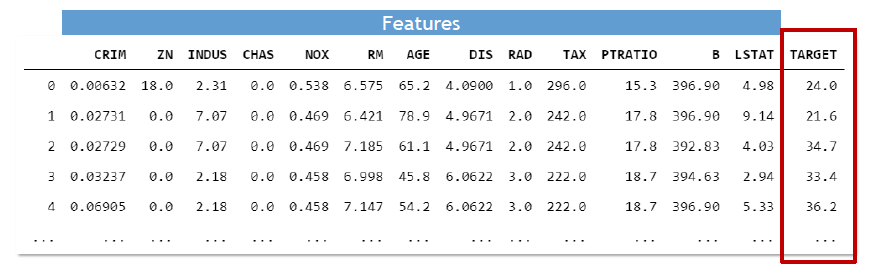

scikit 1.2 부터 load_boston() 중단으로 

In [ ]:
# scikit 1.2 부터 load_boaston() 지원이 중단된다.
# from sklearn.datasets import load_boston
# boston = load_boston()

# boston.feature_names

# boston_df = pd.DataFrame(boston['data'], # 학습 데이터
#                         columns=boston['feature_names'])


In [ ]:
# bostong housing price 원본 데이터
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질수 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 주택 가격

In [ ]:
# 데이터를 살펴봅시다
import pandas as pd
boston_df = pd.DataFrame(boston['data'], # 학습 데이터
                        columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df

## - 단일특성 선형회귀

In [ ]:
# RM 변수와 target과의 관계를 시각화
import matplotlib.pyplot as plt
X_rooms = boston['data'][:, 5] # 학습 데이터의 전체 행, 5번 열
# 산점도 그리기
plt.scatter(X_rooms, boston['target'])
plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.show()

모델 작성과 학습

In [ ]:
# 선형 회귀 모델의 생성
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 학습 진행
reg.fit(X_rooms.reshape(-1, 1), # 학습 데이터
        boston['target']) # 라벨 데이터
# 최종 목적은 회귀 선을 위한 가중치와 절편을 구하는 것
print("모델의 가중치:", reg.coef_)
print("모델의 절편:", reg.intercept_)

In [ ]:
# 실제 학습 데이터와 회귀선
import numpy as np
pred_space = np.linspace(
    min(X_rooms), max(X_rooms)
).reshape(-1, 1)
# 산점도를 그려 봅니다.
plt.scatter(X_rooms, # x축
            boston['target']) # y축
# 회귀선 
plt.plot(pred_space, # X축
         reg.predict(pred_space),
         color="red"
        ) # 우리 모델의 예측값
plt.show()

## - 고차원 선형 회귀

단항회귀는 독립변수(feature)와 종속변수(target)의 관계가 $ y = b + w_1 x_1 $ 형식인 일차방정식 형태로 표현한 회귀였다.

회귀가 독립변수의 다항식 그리고 2차, 3차 방정식 같은 다항식으로 표현되는 것을 다항회귀(Ploynominal Regression)라 한다. 아래 같은 식일 것이다.

$$
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + \cdots + w_n x_n + b 
\\
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2 
$$


특성이 n개 일 경우에 (다항식) 알아야 할 파라미터는 n+1 개 이다. Scikit-learn 은 다변수(다항)도 동일하게 다룰 수 있다.

boston 데이터 셋 모든 특성을 이용한 예측

- 학습 데이터, 테스트 데이터 분할


In [ ]:
# boston 데이터 셋 모든 특성을 이용한 예측
# 학습 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston['data'], boston['target'],
    test_size=0.3, # 테스트 데이터 셋 사이즈 30%
    random_state=42 # 재현성 확보를 위한 랜덤 시드
)

In [ ]:
# 학습 진행
reg_all = LinearRegression()
reg_all.fit(X_train, y_train) # 학습 데이터와 학습 라벨

In [ ]:
# 가중치와 절편
print("가중치:", reg_all.coef_)
print("절편:", reg_all.intercept_)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test, y_test))) # 테스트 데이터

In [ ]:
# 보스턴 데이터 셋의 첫번째 데이터와 타겟
print("데이터 셋 관측치:", boston['data'][1])
print("데이터 셋 label:", boston['target'][1])
# 모델이 예측한 예측치
reg_all.predict(boston['data'][1].reshape(1, 13))

# 4. 정규화 회귀 (Regularized Regression)

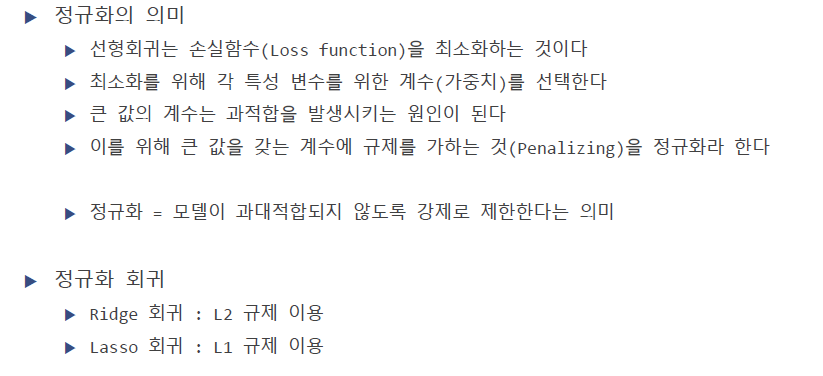

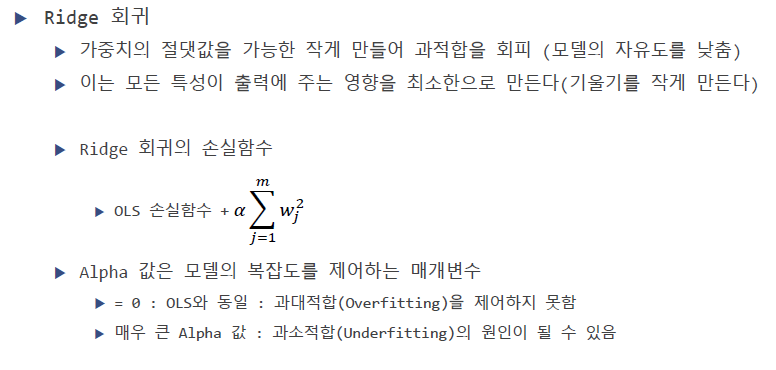

In [ ]:
# Ridge 회귀
# L2 규제를 사용하여 특성의 계수(기울기)를 최소화하는 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, # 알파 계수(규제)
             normalize=True)
ridge.fit(X_train, y_train)

print("Ridge 훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge 테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

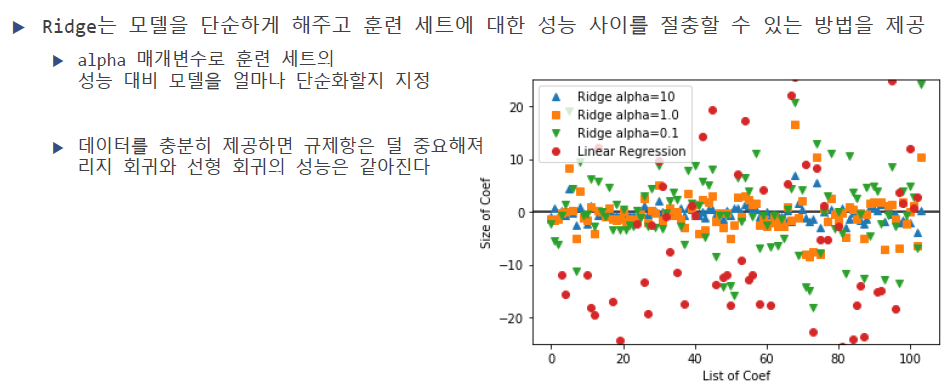

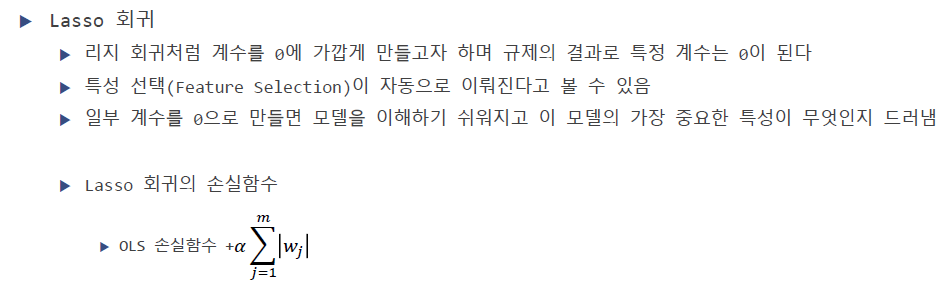

In [ ]:
# Lasso 회귀
# L1 규제를 사용하과 특정 계수를 0으로 만들어서 영향을 없애는 효과(특성 선택)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, # 규제 계수
             normalize=True)
lasso.fit(X_train, y_train)

print("Lasso 훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train))) # 학습 세트 점수
print("Lasso 테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("계수:", lasso.coef_)
# 라소 회귀는 특정 계수를 0으로 만든다
print("사용된 특성의 갯수:", np.sum(lasso.coef_ != 0))

In [ ]:
print("계수:", lasso.coef_)
# 라소 회귀는 특정 계수를 0으로 만든다

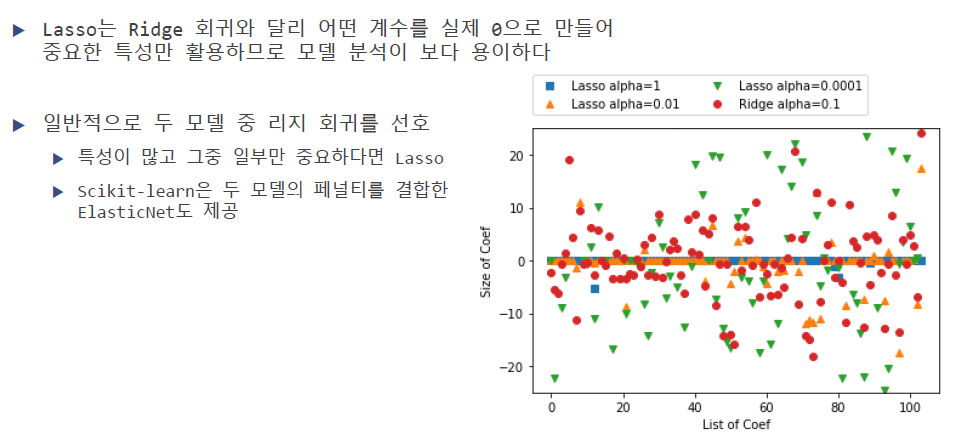